In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier 

In [29]:
data = pd.read_csv('fruits_dataset.data')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [30]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [31]:
data.value_counts("fruit_name")

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

[Text(0.5, 1.0, 'mass and color score')]

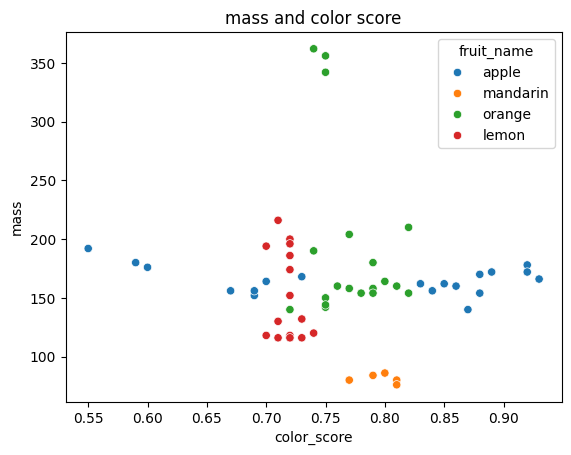

In [32]:
fig1 = sns.scatterplot(x='color_score', y='mass', hue='fruit_name', data=data)
fig1.set(title='mass and color score')

[Text(0.5, 1.0, 'height and width')]

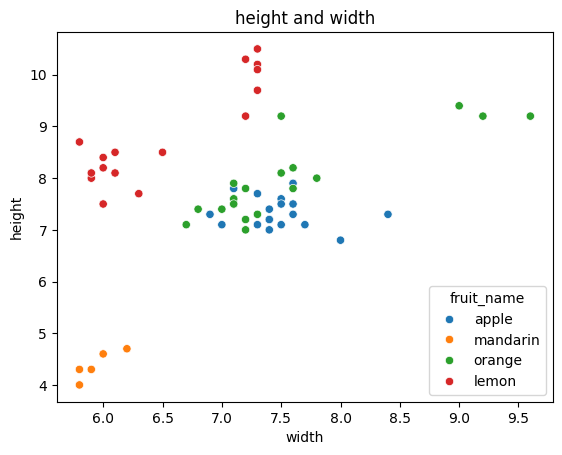

In [33]:
fig2 = sns.scatterplot(x='width', y='height', hue='fruit_name', data=data)
fig2.set(title='height and width')

In [34]:
features = data.iloc[:, 3:7]
label= data.iloc[:, 1]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    features,label, test_size = 0.2,random_state=0
)
print('Jumlah data Train', x_train.shape[0])
print('Jumlah data Test', y_test.shape[0])

Jumlah data Train 47
Jumlah data Test 12


In [35]:
knn = KNeighborsClassifier(n_neighbors = 5, weights="distance")
knn.fit(x_train, y_train)
train_acc = knn.score(x_train, y_train)
print("The accuracy of KNN classifier on training data is : {:.3f}".format(train_acc))

The accuracy of KNN classifier on training data is : 1.000


In [36]:
knn_test_acc = knn.score(x_test, y_test)

print ("The accuracy of KNN classifier on test data is : {:.3f}".format(knn_test_acc))

The accuracy of KNN classifier on test data is : 0.667


Text(0.5, 1.0, 'Confusion Matrix')

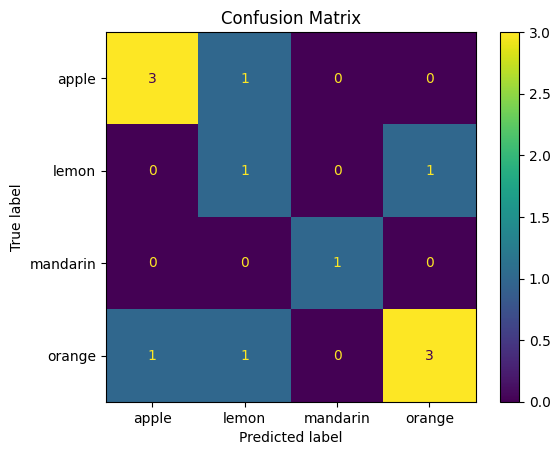

In [37]:
disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)
disp.ax_.set_title("Confusion Matrix")

In [38]:
import pickle
with open('knn_model.pickle', 'wb') as f:
    pickle.dump(knn, f)

In [39]:
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)

new_data = [80, 5.8, 4.5, 0.77]
x = np.array ([new_data])
prediction = model.predict(x)

print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['mandarin']


c:\Users\arkan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
